In [ ]:
'''

Algoritmo retirado do livro "Mathematics of Epidemics on Networks: From Exact to Approximate Models"


Input: Network G, per-edge transmission rate τ, recovery rate γ, set of index node(s) initial infecteds, maximum time tmax.
Output: Lists times, S, I, and R giving number in each state at each time.
    
function Gillespie network epidemic(G, τ, γ, initial infections, tmax)
    times, S, I, R ← [0], [|G|-len(initial infections)], [len(initial infections)], [0]
    infected nodes ← initial infections
    at risk nodes ← uninfected nodes with infected neighbours
    for each node u in at risk nodes do
        infection rate[u] = τ× number of infected neighbours
    total infection rate ← ∑u∈at risk nodes infection rate[u],
    total recovery rate ← γ× len(infected nodes)
    total rate ← total transmission rate + total recovery rate
    time ← exponential variate(total rate)
    while time< tmax and total rate> 0 do
        r = uniform random(0,total rate)
        if r <total recovery rate then
            u = random.choice(infected nodes)
            remove u from infected nodes
            reduce infection rate[v] for u’s susceptible neighbours v
        else
        choose u from at risk nodes with probability infection rate[u]/total infection rate .
        remove u from at risk nodes
        add u to infected nodes
        for susceptible neighbours v of u do
            if v not in at risk nodes then
                add v to at risk nodes
            update infection rate[v]
        update times, S, I, and R
        update total recovery rate, total infection rate, and total rate
        time ← time + exponential variate(total rate)
    return times, S, I, R

'''

C:\Users\Adm\AppData\Local\Temp\ipykernel_9444\739974557.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  time = time + np.random.exponential(1/total_rate)


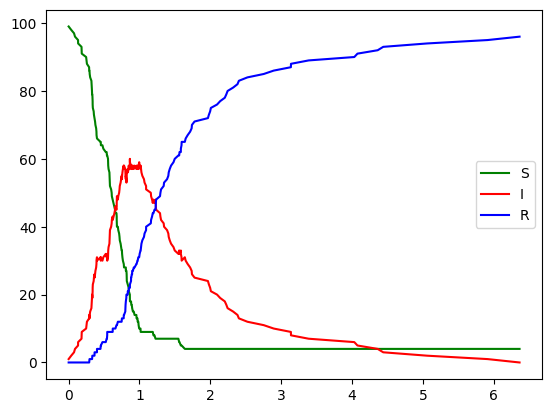

In [111]:
# Gerando o Grafo
import networkx as nx, numpy as np

"""G = nx.Graph()
G.add_nodes_from((0,1,2,3,4))
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,0),(0,2),(0,3),(1,3),(1,4),(2,4)])"""

G = nx.random_regular_graph(3,100)

# Taxa de infecção e recuperação
τ = 4.0
γ = 1.0

# Condições iniciais

initial_infections = [3]

tmax = 1000

times = [0]
S = [len(G.nodes) - len(initial_infections)]
I = [len(initial_infections)]
R = [0]

infected_nodes = initial_infections

# Nós suscetíveis que tem vizinhos infectados
at_risk_nodes = []
for n in infected_nodes:
    viz = list(G.neighbors(n))
    for v in viz:
        if v not in infected_nodes:
            at_risk_nodes.append(v)

at_risk_nodes = list(set(at_risk_nodes))            

# Armazenando em uma variável as taxas de infecção de cada um dos 
# nós suscetíveis em risco
infection_rate = np.zeros(len(G.nodes))
infected_neighbours = []
for n in at_risk_nodes:
    viz = list(G.neighbors(n))
    n_viz = 0
    for vv in viz:
        if vv in infected_nodes:
            n_viz += 1
    infection_rate[n] = τ*n_viz

# Definindo as taxas de infecção total e recuperação total
total_infection_rate = np.sum(infection_rate)

total_recovery_rate = γ*len(infected_nodes)

total_rate = total_infection_rate + total_recovery_rate

# Tempo será selecionado desta forma
time = np.random.exponential(1/total_rate)

# Armazena os nós recuperados para fins de plot.
recovered_nodes = []

# Início do algoritmo de Gillespie
import random as rd
while time < tmax and total_rate > 0:

    """print('\ntime: ', time)"""
    # Sorteando um número aleatório para ver se neste instante de tempo
    # já pré-selecionado ocorrerá uma recuperação de um infectado ou uma
    # infecção de um nós suscetível em risco
    r = rd.uniform(0,total_rate)
    
    # Processo de recuperação de um infectado
    if r < total_recovery_rate:
        
        """print('\nAlguém se recuperará')"""
        
        # Um nó dentro do conjunto de infectados será escolhido aleatóriamente
        u = rd.choice(infected_nodes)
        
        # O nó u será removido do conjunto de infectados e também será alterado
        # sua taxa de infecção, além de que será armazenado este nó numa variável
        # para fins de plot.
        infected_nodes.pop(infected_nodes.index(u))
        infection_rate[u] = 0
        recovered_nodes.append(u)
        
        """print(u,' se recuperou')"""
        
        # Agora que o infectado se recuperou, será atualizado a taxa de infecção
        # de todos os seus vizinhos que estavam em risco, sendo diminuído seus
        # valores
        uviz = list(G.neighbors(u))
        for v in uviz:
            if v not in infected_nodes and v not in recovered_nodes:
                infection_rate[v] -= τ

    # Processo de infecção de um nó suscetível que estava em risco
    else:
            """print('\nAlguém será infectado')"""

            # Será escolhido aleatóriamente um nó entre os suscetíveis em risco
            # com base em sua taxa de infecção, isto é, ele possuindo mais vizinhos
            # infectados o fará ter maior probabilidade dele de ser escolhido.
            
            # infection rate: número de vizinhos infectados vezes a taxa de infecção
            # total infection rate: soma da taxa de infecção com a de remoção
            p = infection_rate/total_infection_rate
            p_list = []
            for i in at_risk_nodes:
                p_list.append(p[i])
                
            u = rd.choices(at_risk_nodes, weights=p_list)[0]

            """print('Nós infectados = ',infected_nodes)
            print('Nós em risco = ',at_risk_nodes)
            print(u,' será infectado')
            print('probabilidade de se infectar =',p)
            print('infection_rate = ',infection_rate)"""

            # O nó em risco escolhido será infectado e será removido do conjunto
            # de nós em risco, indo para o grupo de nós infectados. Sua taxa
            # de infecção irá para zero, já que ele já foi infectado
            at_risk_nodes.pop(at_risk_nodes.index(u))
            infected_nodes.append(u)
            infection_rate[u] = 0


            # Já que u está infectado agora, a taxa de infecção de cada um
            # de seus vizinhos suscetíveis vai aumentar agora.
            uviz = list(G.neighbors(u))
            for v in uviz:
                if v not in infected_nodes and v not in recovered_nodes:
                    if v not in at_risk_nodes:
                        at_risk_nodes.append(v)
                    infection_rate[v] += τ

    # Armazenando dados para fins de plot
    S.append(len(G.nodes) - len(infected_nodes) - len(recovered_nodes))
    
    I.append(len(infected_nodes))
    
    R.append(len(recovered_nodes))
    
    times.append(time)
    
    # Atualizando as taxas e o tempo
    total_recovery_rate = γ*len(infected_nodes)
    
    total_infection_rate = np.sum(infection_rate)
    
    total_rate = total_infection_rate + total_recovery_rate
    
    time = time + np.random.exponential(1/total_rate)


import matplotlib.pyplot as plt

Fig, ax = plt.subplots()
ax.plot(times, S, label='S', color='green')
ax.plot(times, I, label='I', color='red')
ax.plot(times, R, label='R', color='blue')
ax.legend()


In [39]:
list(G.neighbors(0))

[9, 3, 2]